<a href="https://colab.research.google.com/github/RainaVardhan/visualization/blob/main/Copy_of_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [2]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 23
Receiving objects: 100% (34/34), 7.18 MiB | 10.31 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
#Q1.1
import numpy as np
import pandas as pd
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv', low_memory = False)

In [4]:
#Q1.2
print(df.shape,'\n')
print(df.dtypes,'\n')
df.head()

(3798, 63) 

index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 



,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


Dimensions are (3798,63) meaning there are 3798 observations and 63 variables

In [5]:
#Q1.3
control = df['control']
level = df['level']
print(pd.crosstab(control,level, normalize='all'),'\n')

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



From most to least common in control and level of institution:
1. private not-for-profit 4-year - 31%
2. public 2-year                 - 24%
3. public 4-year                 - 17%
4. private for-profit 4-year     - 14%
5. private for-profit 2-year     - 13%
6. private not-for-profit 2-year - 2%

<Axes: xlabel='grad_100_value', ylabel='Count'>

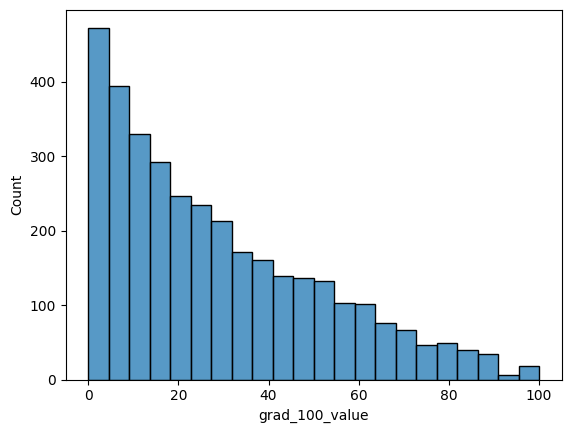

In [6]:
#Q1.4
import seaborn as sns
grad = df['grad_100_value']
sns.histplot(grad)


<Axes: xlabel='grad_100_value', ylabel='Density'>

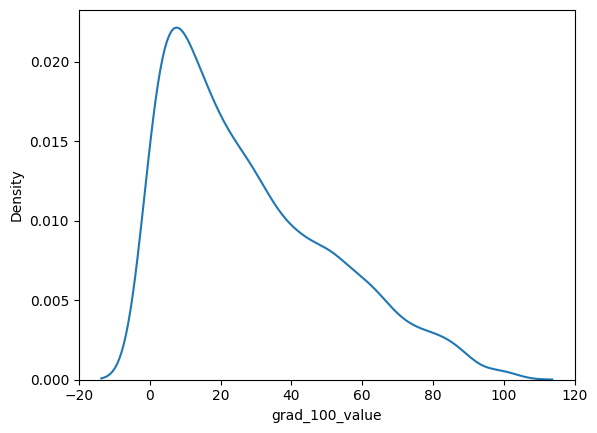

In [7]:
sns.kdeplot(grad)

<Axes: ylabel='grad_100_value'>

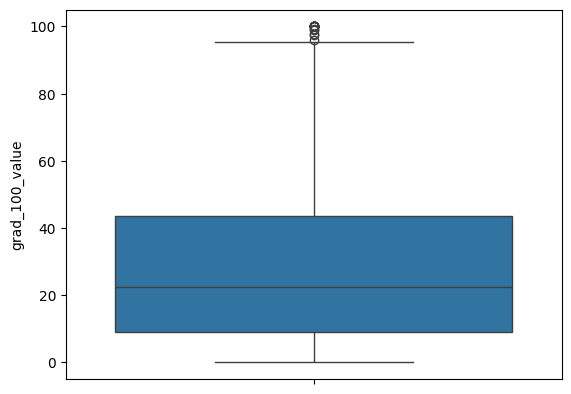

In [8]:
sns.boxplot(grad)

In [9]:
grad.describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

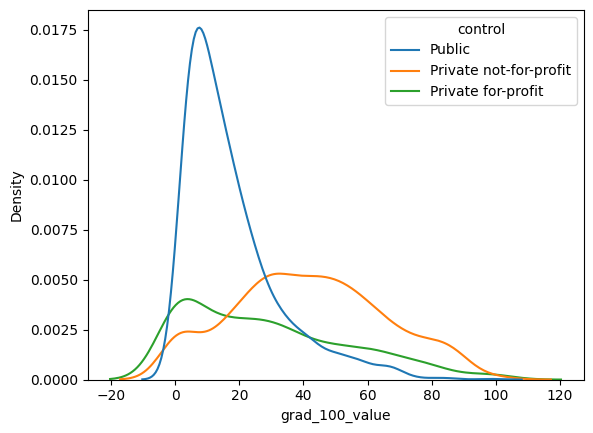

In [10]:
#Q1.5
sns.kdeplot(data=df,x='grad_100_value',hue='control')

This graph shows that private not-for-profit institutions typically have a higher graduation rate than the other institutions. Private institutions have a greater variation in graduation rate than public institutions

<Axes: xlabel='grad_100_value', ylabel='Density'>

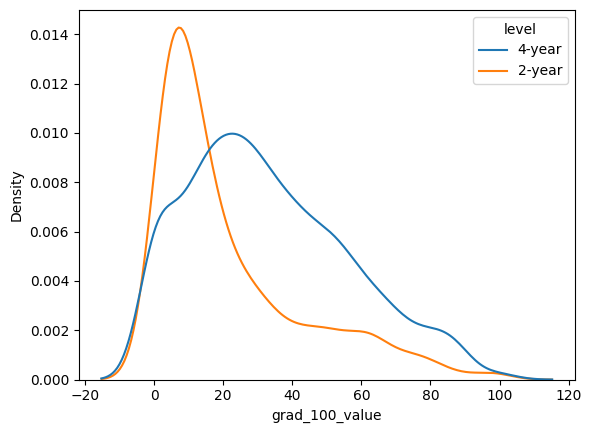

In [11]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

This graph shows that 4-year institutions typically have a higher graduation rate than 2-year institutions

In [12]:
print(df.loc[:,['control','grad_100_value']].groupby('control').describe(),'\n')
print(df.loc[:,['level','grad_100_value']].groupby('level').describe(),'\n')

                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8   

       grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0 

Control: From highest to lowest graduation rates per control of institution
1. private-not-for-profit - 42%
2. private for-profit     - 29%
3. public                 - 18%

Level: From highest to lowest graduation rates per level of institution
1. 4-year - 33%
2. 2-year - 22%

<Axes: xlabel='grad_100_value', ylabel='Density'>

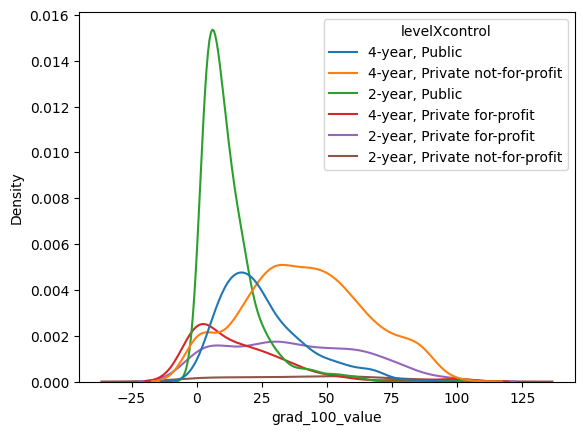

In [13]:
#Q1.6
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

In [14]:
print(df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe(),'\n')


                              grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public      

From highest to lowest graduation rates per institution
1. 2-year private not-for-profit - 42%
2. 4-year private not-for-profit - 42%
3. 2-year private for-profit     - 38%
4. 4-year public                 - 26%
5. 4-year private for-profit     - 17%
6. 2-year public                 - 12%


<Axes: xlabel='aid_value', ylabel='Density'>

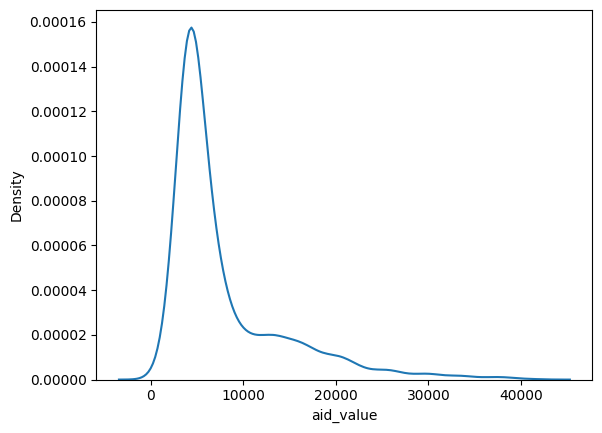

In [15]:
#Q1.7
sns.kdeplot(data=df,x='aid_value')

<Axes: xlabel='aid_value', ylabel='Density'>

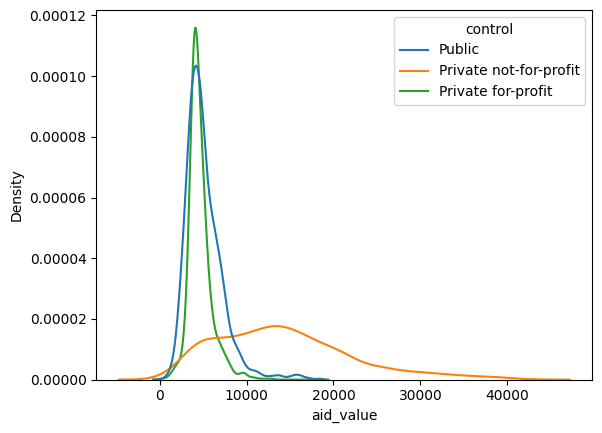

In [16]:
sns.kdeplot(data=df,x='aid_value',hue='control')


The shape of this plot shows that private not-for-profit institutions give the most aid while public and private for-profit instutions don't give as much but they both offer around the same amount of aid

<Axes: xlabel='aid_value', ylabel='Density'>

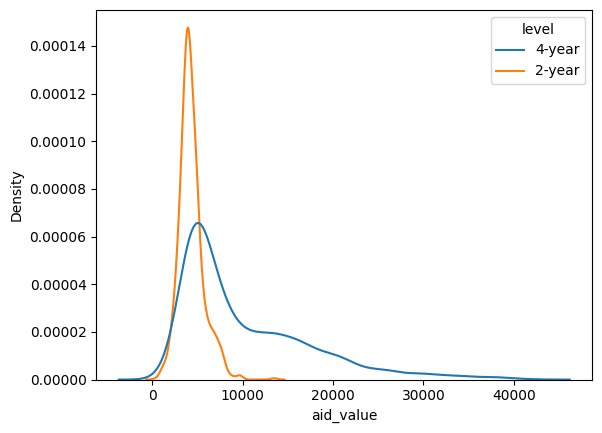

In [17]:
sns.kdeplot(data=df,x='aid_value',hue='level')


This shape shows that 4-year institutions offer a lot more aid than 2-year instutions

In [18]:
print(df.loc[:,['control','aid_value']].groupby('control').describe(),'\n')
print(df.loc[:,['level','aid_value']].groupby('level').describe(),'\n')

                       aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0   

       aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

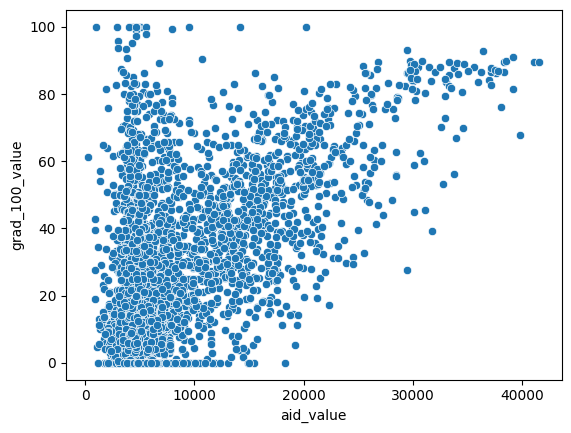

In [19]:
#Q1.8
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')


Shows that there is a positvate correlation between amount of aid and graduation rates but it can also be seen that gradutation rates seem to increase even when aid value stays the same

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

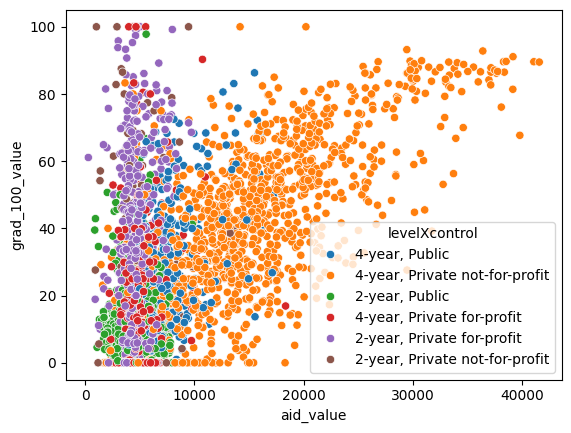

In [20]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='levelXcontrol')

Shows that 4-year private not-for-profit institutions have the positive correlation between aid value and graduation rates because as the aid value increases, the graduation rate also increases generally. All the other colleges show no real correlation as the graduation rates are in all ranges for the same aid value

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [23]:
#Q4.1
import numpy as np
import pandas as pd
df = pd.read_csv('/content/visualization/assignment/data/Socrata-ModelAwardees_6_22_21-1.csv', low_memory = False, encoding='latin-1')
print(df.shape,'\n')
print(df.dtypes,'\n')
df.head()

(171, 12) 

Institute           object
Keywords            object
Project             object
Geographic Reach    object
Funding Amount      object
3 year savings      object
Summary             object
Category            object
Stage               object
Model               object
url                 object
Unique ID            int64
dtype: object 



,Institute,Keywords,Project,Geographic Reach,Funding Amount,3 year savings,Summary,Category,Stage,Model,url,Unique ID
0,Suttercare Corporation,"Health Care Innovation Awards, HCIA, Californi...",Advanced Illness Management (AIM),California,"13,000,000.00","29,388,894.00",Sutter Health is receiving an award to expand ...,Initiatives to Accelerate the Development and ...,Ongoing,Health Care Innovation Awards,http://innovation.cms.gov/initiatives/particip...,2
1,Ben Archer Health Center,"Health Care Innovation Awards, HCIA, New Mexic...",A home visitation program for rural population...,New Mexico,"1,270,845.00","6,325,888.00",Ben Archer Health Center in southern New Mexic...,Initiatives to Accelerate the Development and ...,Ongoing,Health Care Innovation Awards,http://innovation.cms.gov/initiatives/particip...,3
2,"Finity Communications, Inc.","Health Care Innovation Awards, HCIA, Pennsylva...",EveryBODY Get Healthy,Pennsylvania,"4,967,962.00","8,200,000.00","The Finity Communications, Inc. model is desig...",Initiatives to Accelerate the Development and ...,Ongoing,Health Care Innovation Awards,http://innovation.cms.gov/initiatives/particip...,33
3,The Trustees of the University of Pennsylvania,"Health Care Innovation Awards, HCIA, Delaware,...",A rapid cycle approach to improving medication...,"Delaware, New Jersey, New York, Pennsylvania","4,841,221.00","2,787,030.00",The University of Pennsylvania received an awa...,Initiatives to Accelerate the Development and ...,Ongoing,Health Care Innovation Awards,http://innovation.cms.gov/initiatives/particip...,4
4,Institute for Clinical Systems Improvements,"Health Care Innovation Awards, HCIA, Californi...",Care management of mental and physical co-morb...,"California, Colorado, Massachusetts, Michigan,...","17,999,635.00","27,693,046.00",The Institute for Clinical Systems Improvement...,Initiatives to Accelerate the Development and ...,Ongoing,Health Care Innovation Awards,http://innovation.cms.gov/initiatives/particip...,14


Q4.2:
The data dictionary does not document how missings are handled.For categorical variables, possible values are described as plain text fields; they do not describe missing variables as I don't think there are missing variables in those columns.For numerical variables, possible values are desribed as number fields; they do not describe missing variables but I would assume a missing variable would equate to 0 because the columns dealing with numerical variables are money related. Overall, the data dictionary is helpful to see what each of the variables are and what they are describing but it would have been more helpful if they gave information about missing variables.


Q4.3
Some of the variables I found interesting were Geographic Reach, Funding Amount, and 3 Year Saving. Jointly I find them interesting because I want to see if there is a correlation between the hospital instutions localities with how much funding they receive and if they have more savings. Usually hospitals that have more branches would have higher funding and thus have more savings so by analyzing this data, I would like to see if this evident.

In [73]:
reach = df['Geographic Reach']
funding = df['Funding Amount']
savings = df['3 year savings']
reach = reach.str.split(",") #Split the states listed by the comma so I can compare the geographical reach between hospitals
funding = pd.to_numeric(funding.str.replace(",",""), errors = "coerce") #Removed the commas from the numbers and forced them to be numeric rather than strings
savings = savings.replace(np.nan, "0") #Replaced all the missing values with 0
savings = pd.to_numeric(savings.str.replace(",",""), errors = "coerce") #Removed the commas from the numbers and forced them to be numeric rather than string
df['Geographic Reach'] = reach
df['Funding Amount'] = funding
df['3 year savings'] = savings
print(reach);
print(funding);
print(savings);

0                                           [California]
1                                           [New Mexico]
2                                         [Pennsylvania]
3      [Delaware,  New Jersey,  New York,  Pennsylvania]
4      [California,  Colorado,  Massachusetts,  Michi...
                             ...                        
166                                          [Wisconsin]
167                                         [California]
168                                           [New York]
169                                    [Iowa,  Nebraska]
170                                           [New York]
Name: Geographic Reach, Length: 171, dtype: object
0      13000000.0
1       1270845.0
2       4967962.0
3       4841221.0
4      17999635.0
          ...    
166     9457875.0
167     5820416.0
168     8781296.0
169    10171220.0
170     1000000.0
Name: Funding Amount, Length: 171, dtype: float64
0      29388894.0
1       6325888.0
2       8200000.0
3       2787030.0
4 

<Axes: ylabel='Funding Amount'>

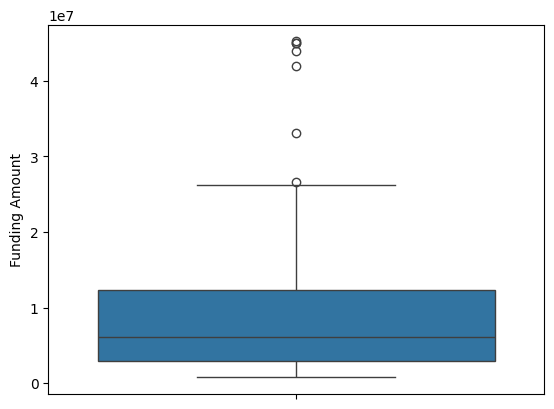

In [74]:
#Q4.4
sns.boxplot(funding)

<Axes: ylabel='3 year savings'>

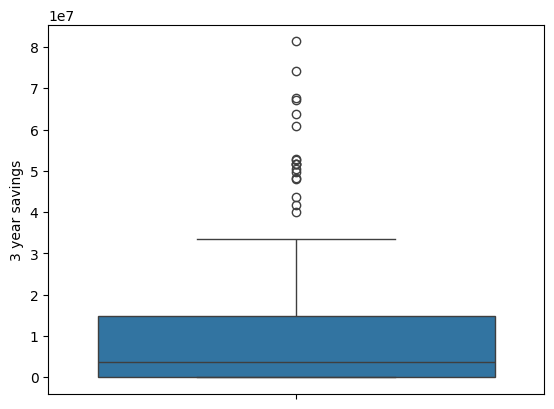

In [62]:
sns.boxplot(savings)

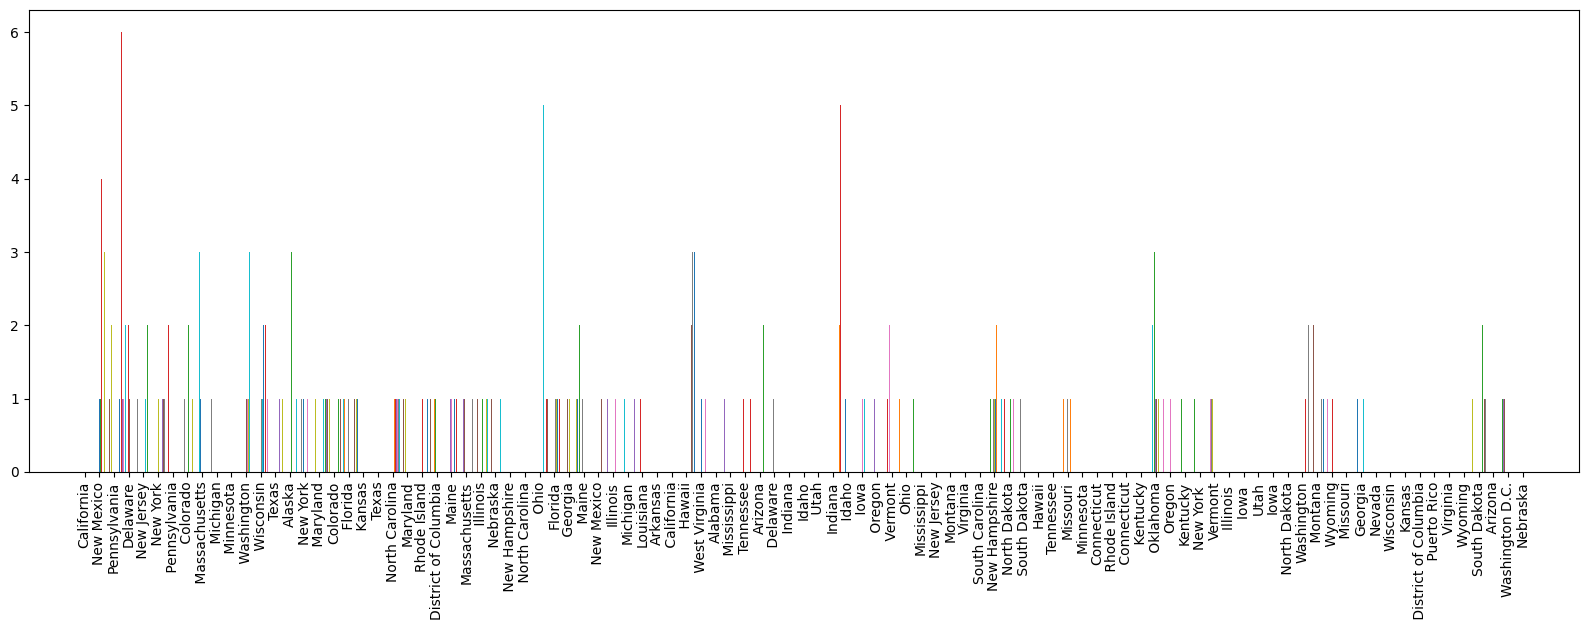

In [72]:
import matplotlib.pyplot as plt
plt.hist(reach)
plt.xticks(rotation = "vertical")
plt.gcf().set_size_inches(20, 6) #Searched up how to do this because the data was very cramped and I couldn't read it
plt.show()

For the numeric variables, funding and savings, there seem to be higher outliers which makes sense as some hospitals typically are more have more funding and higher savings if they have more patients, additional services, a lot of advertising, etc. For the categorical variable, reach, there aren't any outliers.

0      1
1      1
2      1
3      4
4      8
      ..
166    1
167    1
168    1
169    2
170    1
Name: Geographic Reach, Length: 171, dtype: int64


<Axes: xlabel='Funding Amount', ylabel='Density'>

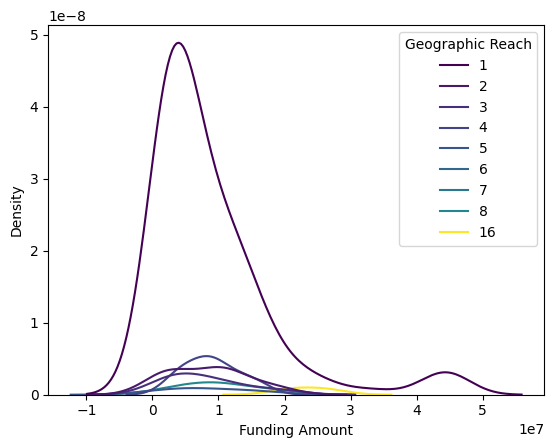

In [95]:
#Q4.5
count = reach.apply(len)
print(count)
sns.kdeplot(x=funding,hue=count, warn_singular=False, palette = "viridis") #Searched up how to change the graph colors because it was too hard to see the difference between the original colors


The shape of the graph indicates that the hospital instutions with the smallest geographic reach of 1, has the most funding amount. Additionally, the hospital instutions with the highest geographic reach of 16, has the second highest.

<Axes: xlabel='3 year savings', ylabel='Density'>

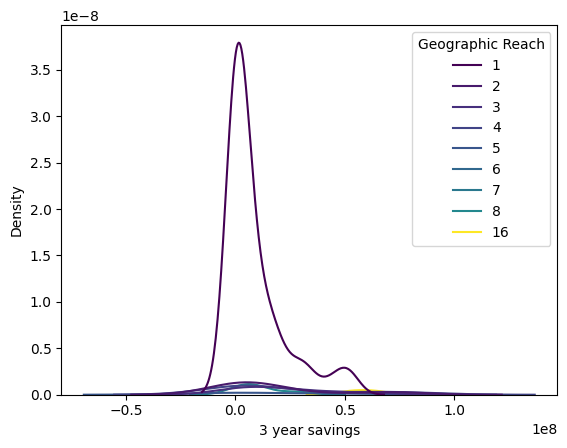

In [97]:
sns.kdeplot(x=savings,hue=count, warn_singular=False, palette = "viridis")

The shape shows that except for the hospital instituions with the smallest geographical reach of 1, all the other hospital institutions have relatively the same density when it comes to 3 year savings.

To get these kernal density plots, I had to transform the categorical data to numeric data so that I could see whether the amount of locations each hospital has has any pattern with their funding an savings amounts.

<Axes: xlabel='Funding Amount', ylabel='3 year savings'>

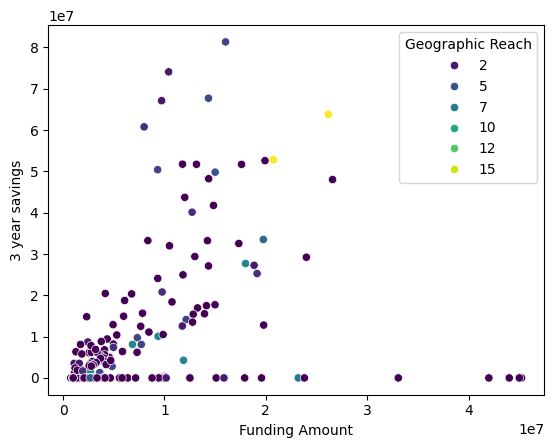

In [102]:
#Q4.6
sns.scatterplot(data=df,x=funding,y=savings,hue=count, palette="viridis")

This shape shows there is a loose positive correlation between funding amount and savings, especially when looking at hospital instutions that have a geographical reach of 15, 10, and 5. However when you look at hospitals with a geographical reach of 2, the amount of savings can vary and even stay the same amount when the funding amount increases.

In [113]:
df['Hospital Location Count'] = count
print(df.loc[:,['Funding Amount','Hospital Location Count']].groupby('Hospital Location Count').describe())
print(df.loc[:,['3 year savings','Hospital Location Count']].groupby('Hospital Location Count').describe())

                        Funding Amount                              \
                                 count          mean           std   
Hospital Location Count                                              
1                                128.0  8.750834e+06  9.376834e+06   
2                                 12.0  8.288338e+06  5.767334e+06   
3                                  8.0  7.903489e+06  5.845128e+06   
4                                 11.0  8.930167e+06  4.054236e+06   
5                                  3.0  8.268836e+06  6.245841e+06   
6                                  1.0  1.975734e+07           NaN   
7                                  1.0  2.319892e+07           NaN   
8                                  5.0  9.759931e+06  5.725097e+06   
16                                 2.0  2.346122e+07  3.834243e+06   

                                                                           \
                                min          25%         50%          75%   
Hospi

Funding:
From highest to lowest average amount of funding per the amount of hospital locations
1. 16 - 2.346122e+07
2. 7 -  2.319892e+07
3. 6 -  1.975734e+07
4. 8 -  9.759931e+06
5. 4 -  8.930167e+06
6. 1 -  8.750834e+06
7. 2 -  8.288338e+06
8. 5 -  8.268836e+06
9. 3 - 7.903489e+06

Savings:
From highest to lowest average amount of savings per the amount of hospital locations
1. 16 - 5.831129e+07
2. 6 -  3.351488e+07
3. 4 -  2.181728e+07
4. 3 -  2.057765e+07
5. 2 -  1.727704e+07
6. 5 -  1.660508e+07
7. 8 -  1.033254e+07
8. 1 -  8.708468e+06
9. 7 -  0.000000e+00  


I don't see any real correlation between savings, funding, and hospital location count but it is interesting to see that the hospitals with the greatest reach, 16, has the highest average in funding and savings.